In [1]:
import numpy as np
from torch import Tensor
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
from sklearn.preprocessing import StandardScaler
from MLCode.NN import NN_HyperParameters
from MLCode.NN_cup import NN_Regressor, train_NN_cup, save_training, train_NN_K_validation, saved_NN_models
import matplotlib.pyplot as plt

In [2]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

Y_scaler = StandardScaler()
Y_scaler.fit(Y_dev)

X_dev, Y_dev = Tensor(X_dev), Tensor(Y_dev)

# 20% validation
val_samples = X_dev.shape[0] // 5
X_train = X_dev[:-val_samples]
Y_train = Y_dev[:-val_samples]

X_val = X_dev[-val_samples:]
Y_val = Y_dev[-val_samples:]

layers = [ 10, 50, 50,]
lr = 0.011
beta1 = 0.9
beta2 = 0.999
weight_decay = 0
mb_size = 32

MEE mean: 3.0912272877936817
MEE std: 0.0
Time (seconds): 3.767842012000017
Convergence: True


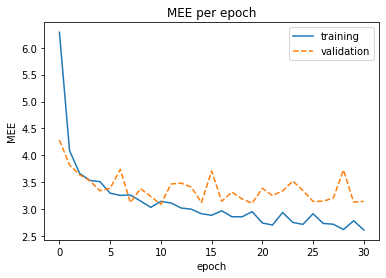

In [11]:
NN_HP = NN_HyperParameters(
    [10, 50, 50],
    lr=1.1E-2,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0,
    mb_size=32,
)
net = NN_Regressor(2,NN_HP, Y_scaler)


stats = train_NN_cup(net, X_train, Y_train, X_val, Y_val, 20,500)
# stats = train_NN_K_validation(net, 5, X_dev, Y_dev)
save_training(stats, NN_HP)

In [10]:
df = saved_NN_models()
df = df.sort_values(by=['MEE_mean'])
# select on number of layers:
df = df[df['model_name'].str.startswith('2')]
df


,model_name,MEE_mean,MEE_std
2,2x50_1.0E-02,3.012351,0.132226
3,2x25_1.0E-02,3.048910,0.084590
4,2x50_1.0E-03,3.139962,0.142174
0,2x25_1.0E-03,3.179805,0.179217
5,2x50_1.0E-04,3.407172,0.133249
1,2x25_1.0E-04,3.426612,0.184843


In [ ]:
import pandas as pd
import seaborn as sns

df = saved_NN_models()
df = df.sort_values(by=['model_name'])
# select on number of layers:
df = df[df['model_name'].str.startswith('2')]

array = df['model_name'].to_numpy()
array = array.reshape(-1,3).transpose()
df2 = pd.DataFrame(array)
df2 = df2.reindex([0,2,1])
df2 = df2[[4,6,7,1,3,5,0,2]]
df2

In [ ]:
array = df['MEE_mean'].to_numpy()
array = array.reshape(-1,3).transpose()
df2 = pd.DataFrame(array)
df2 = df2.reindex([0,2,1])
df2 = df2[[4,6,7,1,3,5,0,2]]
df2
# sns.heatmap(df2.to_numpy(), cmap='Greys_r')

In [ ]:
sns.heatmap(df2.to_numpy(), cmap='Greys_r')

In [ ]:
import pandas as pd
import seaborn as sns

df = saved_NN_models()
df = df.sort_values(by=['model_name'])
# select on number of layers:
df = df[df['model_name'].str.startswith('3')]

array = df['model_name'].to_numpy()
array = array.reshape(-1,3).transpose()
df2 = pd.DataFrame(array)
df2 = df2.reindex([0,2,1])
df2 = df2[[2,4,1,3,0]]
df2

In [ ]:
array = df['MEE_mean'].to_numpy()
array = array.reshape(-1,3).transpose()
df2 = pd.DataFrame(array)
df2 = df2.reindex([0,2,1])
df2 = df2[[2,4,1,3,0]]
df2
# sns.heatmap(df2.to_numpy(), cmap='Greys_r')

In [ ]:
sns.heatmap(df2.to_numpy(), cmap='Greys_r')